# Predicting heart disease using machine learning 
This notebook looks into using various Python-based ml and data science libraries in an attemt to build 
a machine learning model apable of predicting hether or not someone has heart disease based on their medical
attributes.


## APPROACH
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem Definition
In a statement,
>Given clinical parameters about a patient , can we predict whether or not they have heart disease?

### Data
Heart disease data (structured data) 

The original data came from the Cleveland database from UCI Machine Learning Repository.

It is also available on Kaggle.

### Evaluation
To achieve 95% accuracy in predicting whether a person can get a heart disease or not .

### Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data



In [6]:
import pandas as pd
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Import all the tools 

# Regular libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborm modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report

##### Data xploration

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

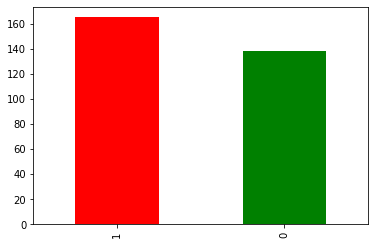

In [18]:
data['target'].value_counts().plot(kind='bar',color=['red','green'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'count'),
  Text(0, 1.5, 'mean'),
  Text(0, 2.5, 'std'),
  Text(0, 3.5, 'min'),
  Text(0, 4.5, '25%'),
  Text(0, 5.5, '50%'),
  Text(0, 6.5, '75%'),
  Text(0, 7.5, 'max')])

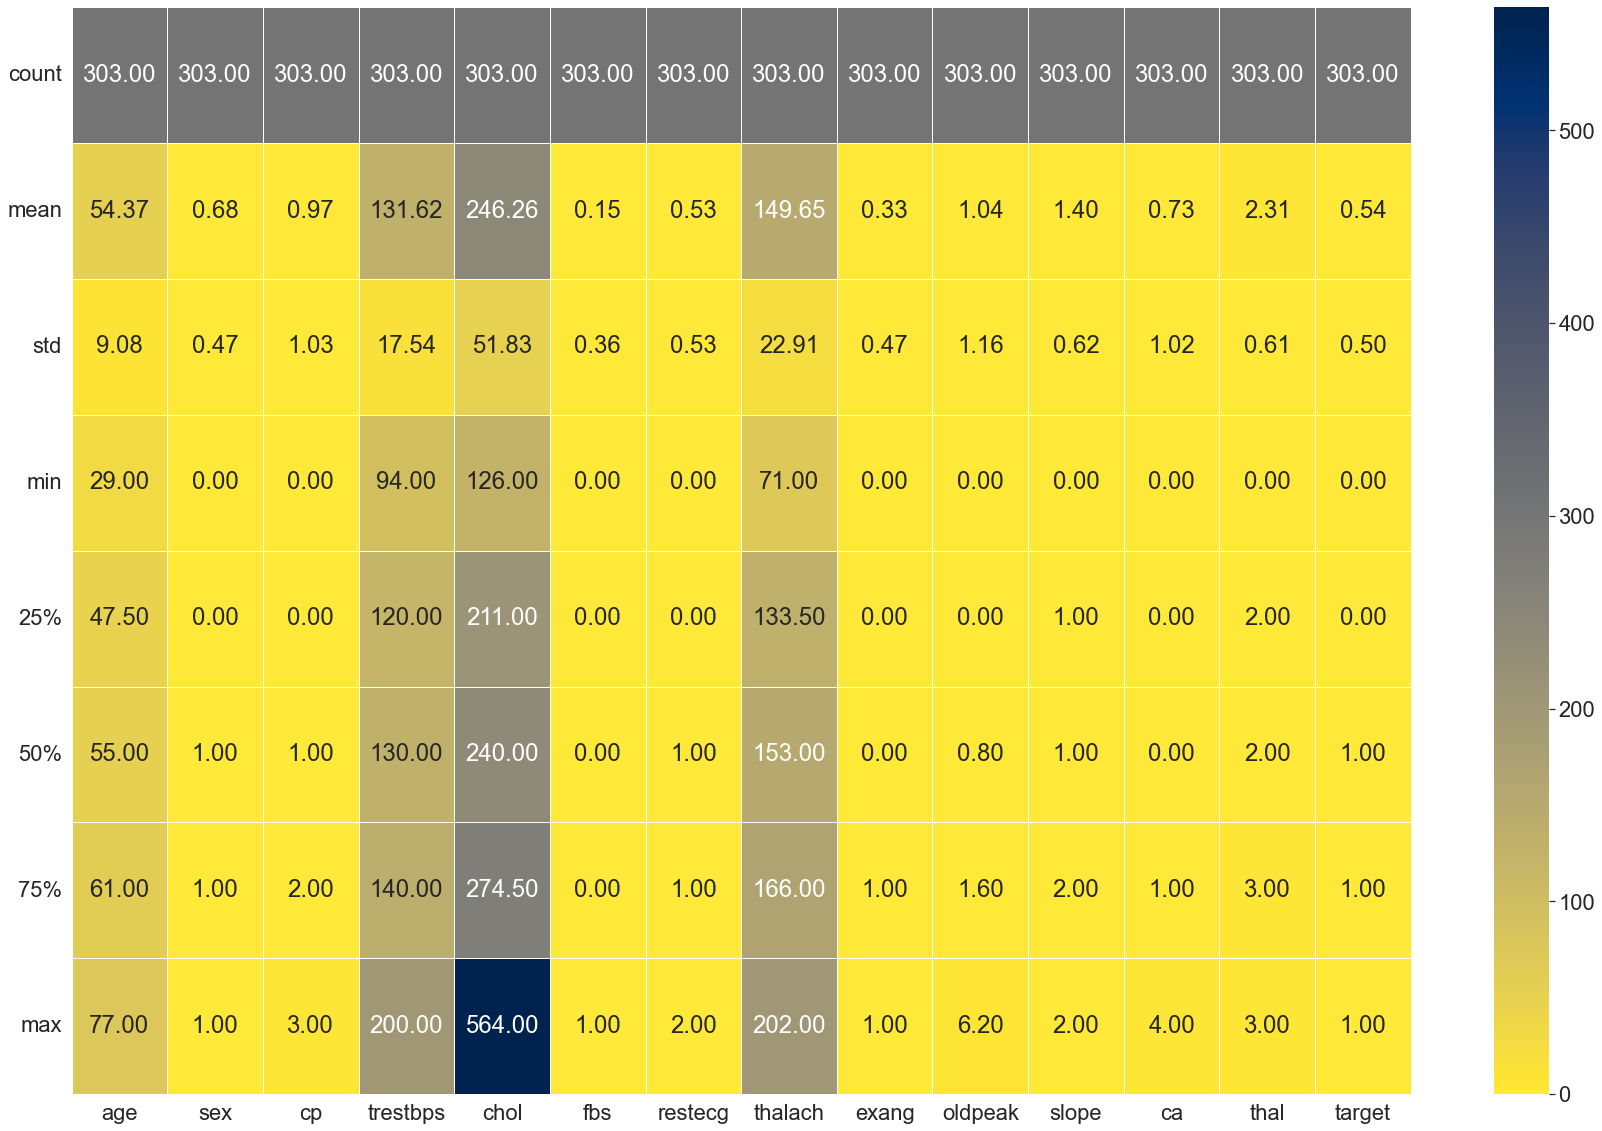

In [99]:
plt.figure(figsize=(30,20))
sns.set(font_scale=2)
sns.heatmap(data.describe()
            ,annot=True
            ,fmt='.2f'
            ,cmap='cividis_r'
           ,linewidths=0.5)
plt.yticks(rotation=0)

In [24]:
# FiNding patterns in the given data
# On the basis OF Sex
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
matrix=pd.crosstab(data.target,data.sex)

Text(38.5, 0.5, '0 = no disease and 1 = disease')

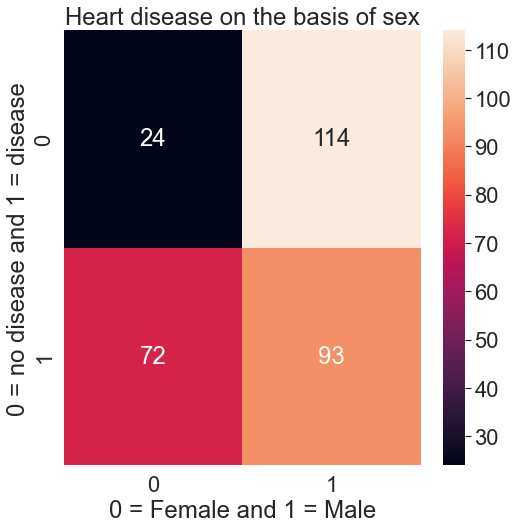

In [104]:
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.heatmap(matrix,annot=True,fmt='d')
plt.title('Heart disease on the basis of sex')
plt.xlabel("0 = Female and 1 = Male")
plt.ylabel("0 = no disease and 1 = disease")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

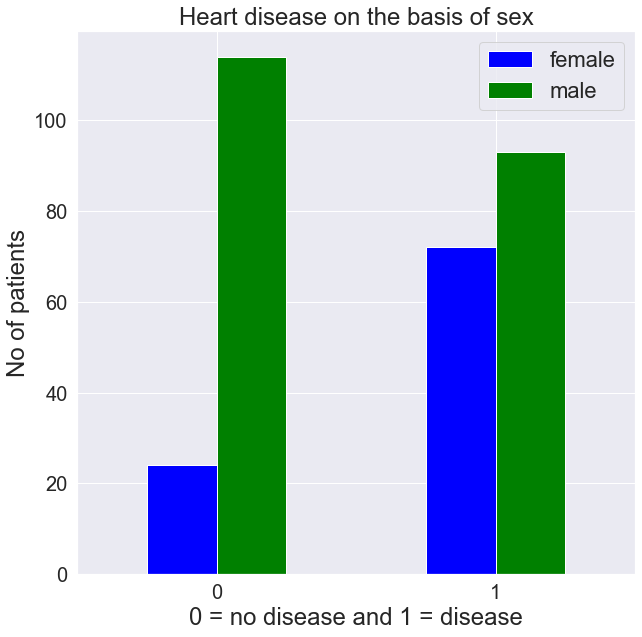

In [58]:
sns.set(font_scale=2)
pd.crosstab(data.target,data.sex).plot(kind='bar',
                                       figsize=(10,10),
                                       color=['blue','green'],
                                       fontsize=20)

plt.title('Heart disease on the basis of sex')
plt.legend(['female','male'])
plt.ylabel("No of patients")
plt.xlabel("0 = no disease and 1 = disease")
plt.xticks(rotation=0)

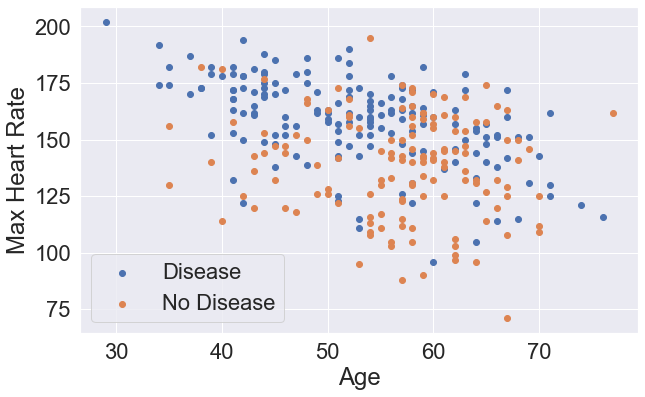

In [67]:
# Finding pattern 2
# Using age and maximum heart rate
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1])
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"],loc=3)

<AxesSubplot:ylabel='Frequency'>

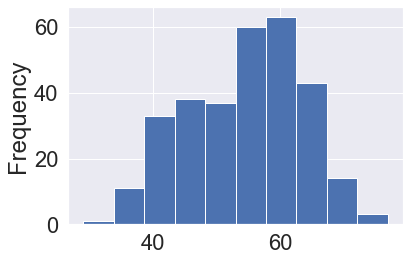

In [68]:
data.age.plot.hist()

In [71]:
# Heart Disease frequency pe chest pain type
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2'), Text(0, 3.5, '3')])

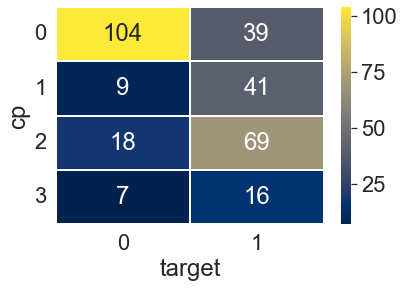

In [82]:
sns.heatmap(pd.crosstab(data.cp,data.target)
            ,annot=True
            ,fmt='d'
            ,cmap='cividis'
           ,linewidths=0.3)
plt.yticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

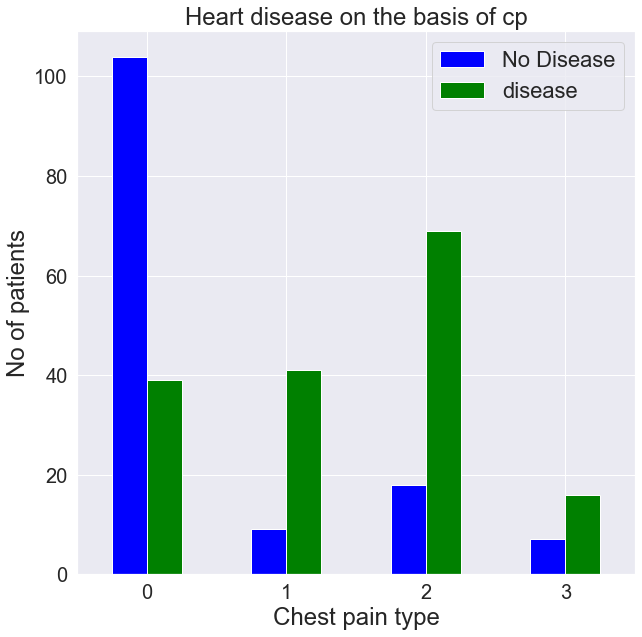

In [77]:
pd.crosstab(data.cp,data.target).plot(kind='bar',
                                       figsize=(10,10),
                                   color=['blue','green'],fontsize=20)
plt.title('Heart disease on the basis of cp')
plt.legend(['No Disease','disease'])
plt.ylabel("No of patients")
plt.xlabel("Chest pain type")
plt.xticks(rotation=0)

In [84]:
# Finding correlation matrix and plotting it
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

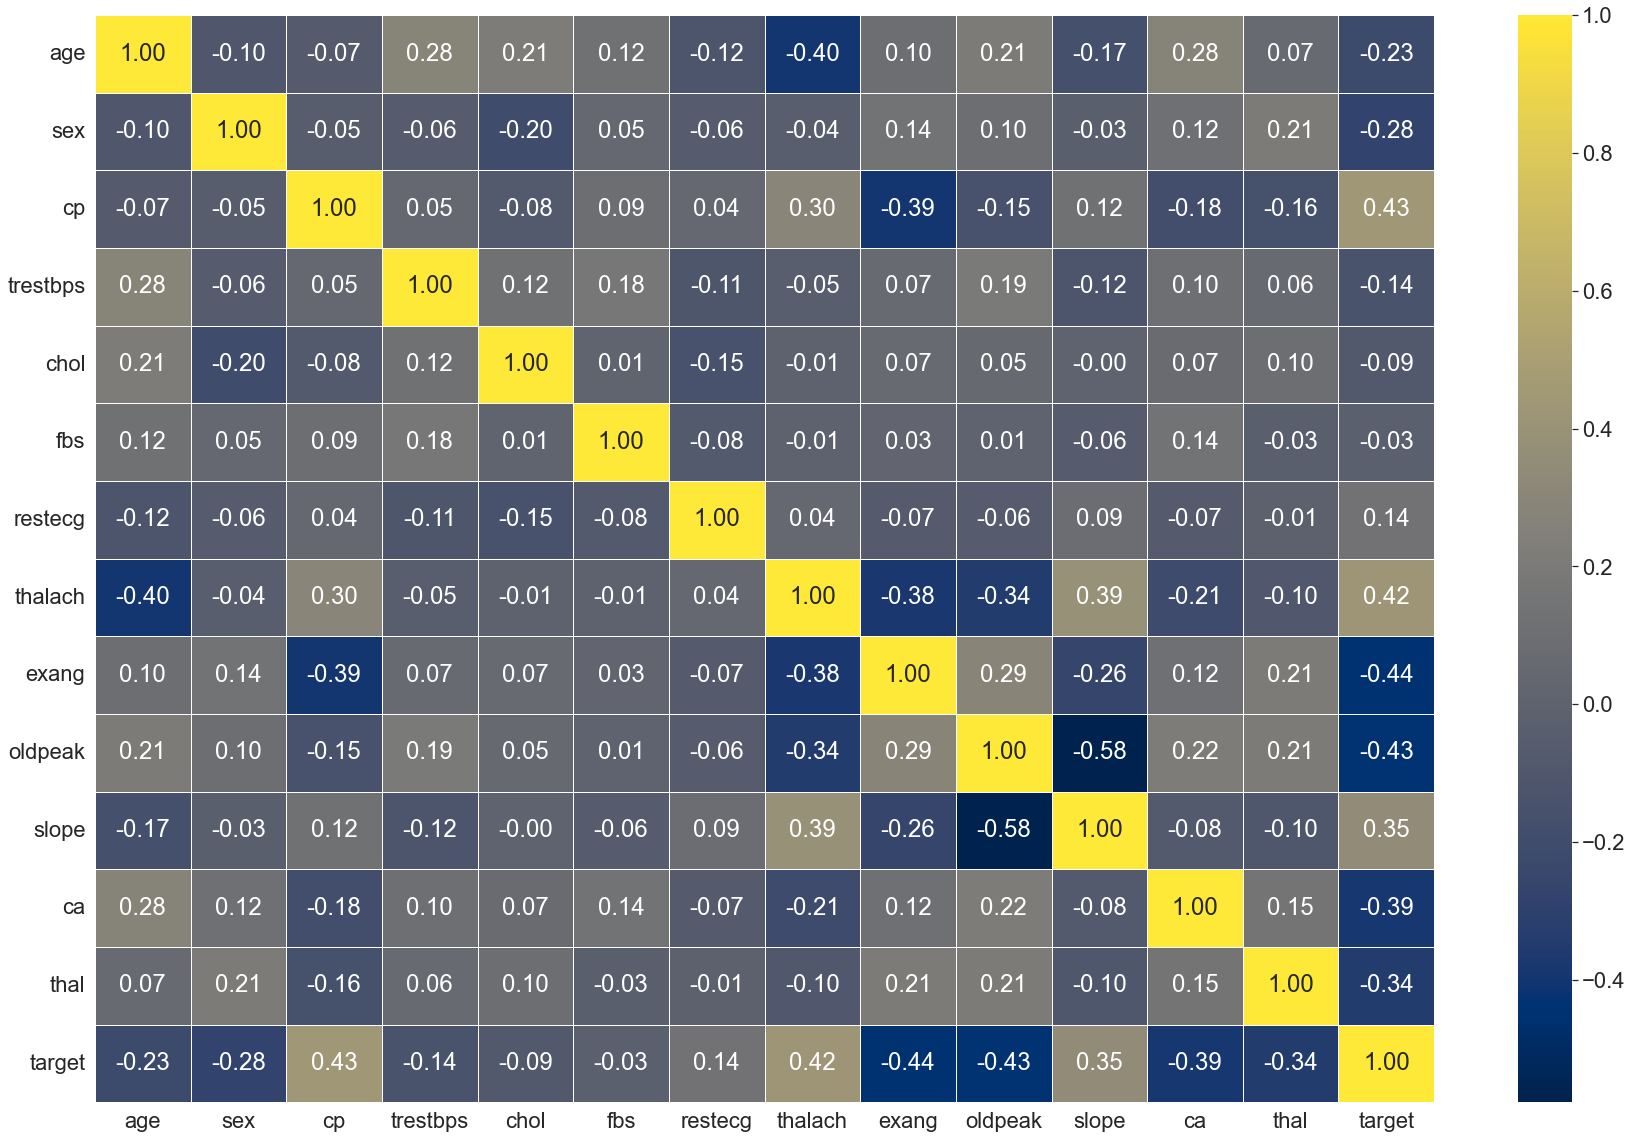

In [106]:
plt.figure(figsize=(30,20))
sns.set(font_scale=2)
sns.heatmap(data.corr()
            ,annot=True
            ,fmt='.2f'
            ,cmap='cividis'
           ,linewidths=0.5)
plt.yticks(rotation=0)


### MODELLING

In [110]:
# Split the data into x and y
x=data.drop('target',axis=1)
y=data['target']

# Split the data into train and test part
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Testing the data using different ml model
#### 1. Logistics Regression
#### 2. K-Nearest Neighbours Classifier
#### 3. Random Forest Classifier

In [139]:
# Putting the model into dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest Classifier":RandomForestClassifier()}

# Creating a function to fit and score models
def fit_score(models,x_train,x_test,y_train,y_test):
    """
    This function fit and score given machine learning models.
    Here models= a dictionary with different machine learning models.
    x_train=training data (no labels)
    x_test=testing data (no labels)
    y_train=training labels 
    y_test=testing labels
    
    """
    # Set random seed
    np.random.seed(42)
    
    # Create a output dictionary for score of diff models
    model_scores={}
    
    #Loop Through models and produce scores
    for name ,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
        
    # Plot the dat to make it more understandable
    sns.set(font_scale=1)
    pd.DataFrame(model_scores,index=["Accuracy"]).T.plot.bar()
    
    
    return model_scores

C:\Users\Himanshu Shekhar\python\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

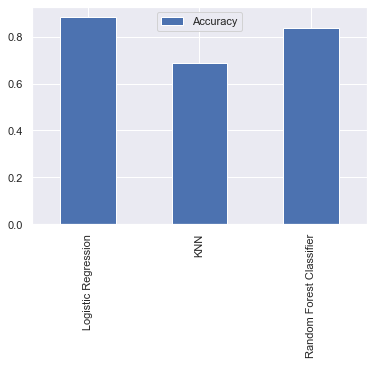

In [140]:
model_scores=fit_score(models,x_train,x_test,y_train,y_test)
model_scores

 #### Hyper tuning the  models

(0.7540983606557377, 0.6229508196721312)

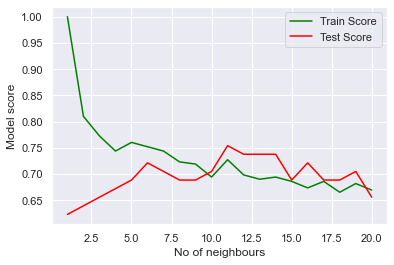

In [141]:
# Tuning the KNN model
train_score=[]
test_score=[]

neighbours=range(1,21)

knn= KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
    
plt.plot(neighbours,train_score,color='green',label="Train Score")
plt.plot(neighbours,test_score,color='red',label="Test Score")
plt.legend()
plt.xlabel("No of neighbours")
plt.ylabel("Model score")
max(test_score),min(test_score)

In [142]:
# Tuning with RandomizedSearchCv
# * Logistics Regression and Random Forest Classifier
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
Ra_for_grid={"n_estimators":np.arange(150,1000,50),
             "max_depth":[None,2,10,6],
             "min_samples_split":np.arange(2,20,2),
             "min_samples_leaf":np.arange(1,20,2)}

In [158]:
#LogisticRegression
np.random.seed(42)

rs_lr=RandomizedSearchCV(LogisticRegression(),
                         param_distributions=log_reg_grid,
                         cv=10,
                         n_iter=20,
                         verbose=True
                        )
rs_lr.fit(x_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [159]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [160]:
rs_lr.score(x_test,y_test)

0.8524590163934426

In [161]:
#RandomizedSearchCV
np.random.seed(42)

rs_ra=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=Ra_for_grid,
                         cv=5,
                         verbose=True,
                         n_iter=20
                        )
rs_ra.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 10, 6],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750,
       800, 850, 900, 950])},
                   verbose=True)

In [162]:
rs_ra.score(x_test,y_test)

0.8688524590163934

In [219]:
# Tuning with Grid Search CV BruteForceAPPROACH
#Grid search cv
gr_lr=GridSearchCV(LogisticRegression(),
                   param_grid=log_reg_grid,
                   cv=5,
                   verbose=True,
                   )
gr_lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [220]:
gr_lr.score(x_test,y_test)

0.8852459016393442

In [221]:
gr_ra=GridSearchCV(RandomForestClassifier(),
                   param_grid=Ra_for_grid,
                   cv=5,
                   verbose=True
                  )
gr_ra.fit(x_train,y_train)

Fitting 5 folds for each of 6120 candidates, totalling 30600 fits


KeyboardInterrupt: 

In [ ]:
gr_ra.score(x_test,y_test)

### Evaluation using roc_curve,confusion matrix etc..

C:\Users\Himanshu Shekhar\python\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


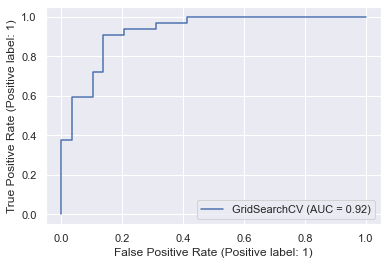

In [239]:
# ROC CURVE
sns.set(font_scale=1)
plot_roc_curve(gr_lr,x_test,y_test)

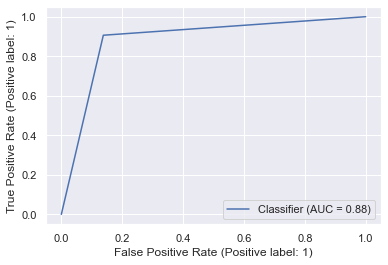

In [240]:
# to remove warning use this modeltuning
y_preds=gr_lr.predict(x_test)
import sklearn
sklearn.metrics.RocCurveDisplay.from_predictions(y_test,y_preds)

In [224]:
# CONFUSION MATRIX
matrix=confusion_matrix(y_test,y_preds)
pd.DataFrame(matrix)

,0,1
0,25,4
1,3,29


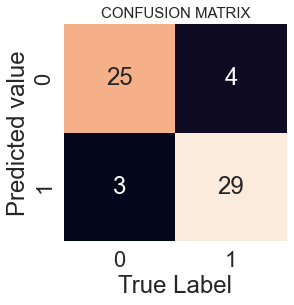

In [225]:
def plot_confusion_matrix(y_test,y_preds):
    """
    USED TO PLOT CONFUSION MATRIX OF A CLASSIFICATION MODEL 
    USES SEABORN HEATMAP TO SHOW THE PLOT
    
    """
    fig,ax=plt.subplots(figsize=(4,4))
    sns.set(font_scale=2)
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt='d',cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted value")
    plt.title("CONFUSION MATRIX",fontdict={"fontsize":15,
                                          "fontweight":100})
    plt.xticks(rotation=0)

    
plot_confusion_matrix(y_test,y_preds)

In [226]:
#Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Evaluation metrics using cross validation

In [227]:
#check best parametrs for the estimator
gr_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [228]:
# Create a new classifier wuth best parameters
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [248]:
# Fit thr module and evalute diff classification report
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='accuracy'
                   )
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [249]:
cv_recall=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='recall'
                   )
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [250]:
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1'
                   )
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [251]:
cv_precision=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='precision'
                   )
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

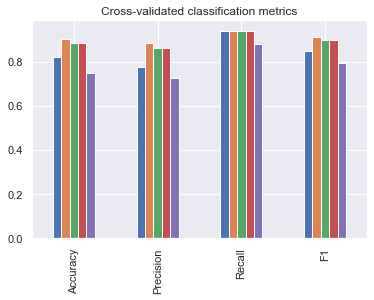

In [252]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1})
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

In [253]:
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.819672,0.775000,0.939394,0.849315
1,0.901639,0.885714,0.939394,0.911765
2,0.885246,0.861111,0.939394,0.898551
3,0.883333,0.861111,0.939394,0.898551
4,0.750000,0.725000,0.878788,0.794521


### Feature Importance

In [256]:
# Fit the model
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')
clf.fit(x_train,y_train)

#check coef_
clf.coef_


array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [260]:
# Match the coef's of features with the column
feature_dict=dict(zip(data.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

<AxesSubplot:title={'center':'Feature Importance'}>

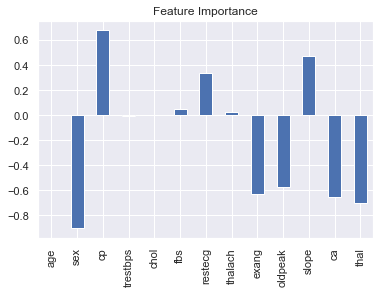

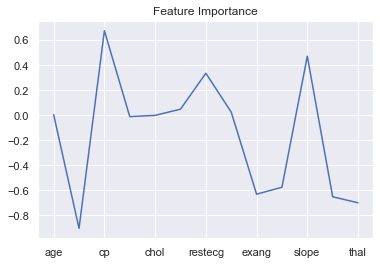

In [266]:
# Plot the to to make it more visulisable
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',title="Feature Importance",legend=False)
feature_df.T.plot(kind='line',title="Feature Importance",legend=False)